In [ ]:
# prompt: import all the necessary modules for data science

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
import copy


## Solo Blackjack Gameplay

Here, we'll implement the most basic form of blackjack:


1.   The player starts off with a stack of 1000
2.   Blackjack pays 3 to 2
3.   A bet of 0 or less terminates the program, displaying the player's stack over time on a chart
3.   Deck is reshuffled after a certain number of cards is gone through (these are customizable in the program)



In [ ]:
# Initialize the deck of cards
deck_s = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_h = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_d = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck_c = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
deck = [deck_s, deck_h, deck_d, deck_c]
new_deck = copy.deepcopy(deck)
cards_to_shuffle = 26
cards_used = 0
def debugger():
  global cards_used, deck, new_deck
  print(cards_used, "\n", deck,"\n", new_deck)

# Define the function to deal a card
def deal_card():
  global cards_used, deck, new_deck
  if cards_used >= cards_to_shuffle:
    deck = copy.deepcopy(new_deck)
    cards_used = 0
    print("Deck is shuffled!")
  cards_used += 1
  while True:
    int1 = random.randint(0,3)
    if len(deck[int1]) > 0:
      return deck[int1].pop(random.randint(0,len(deck[int1])-1))

# Define the function to calculate the score of a hand
def calculate_score(hand):
  score = sum(hand)
  for i in hand:
    if i==11 and score > 21:
      score-=10
  return score

# Define the function to play a game of blackjack
def play_blackjack(): #I think I should split this into two functions: one that calculates each round, the other that runs that and manages the stack
  player_stack = 1000
  bet = 0
  stack_amount = []
  # Play the player's turn
  while True:
    stack_amount.append(player_stack)
    blackjack = False
    dealer_bj = False
    player_bust = False
    print("Your stack: " + str(player_stack))
    while True:
      debugger()
      print("-"*10)
      bet = input("How much to bet? ")
      if bet.isnumeric():
        bet = float(bet)
        player_stack -= bet
        break
      else:
          while not bet.isnumeric():
            bet = input("How much to bet? ")
          bet = float(bet)
          player_stack -= bet
          break
    if (bet <= 0):
      plt.plot(range(0,len(stack_amount)),stack_amount)
      break
    player_hand = [deal_card(), deal_card()]
    dealer_hand = [deal_card(), deal_card()]
    # Print the player's hand and score
    print("Player's hand:", player_hand)
    print("Dealer's hand:", dealer_hand[0])
    print("Player's score:", calculate_score(player_hand))

    if sum(player_hand) == 21 and sum(dealer_hand) < 21:
      print("blackjack!")
      blackjack = True
      player_stack += bet * 2.5
    elif sum(player_hand) < 21 and sum(dealer_hand) == 21:
      print("Dealer's blackjack!")
      dealer_bj = True


    while not blackjack and not dealer_bj:
      # Get the player's input

      choice = input("Hit or stand? (h/s) ")

      # If the player hits, deal them another card
      if choice == "h":
        player_hand.append(deal_card())
        print("Player's hand:", player_hand)

      # If the player stands, break out of the loop
      elif choice == "s":
        break

      # If the player busts, they lose
      if calculate_score(player_hand) > 21:
        # print("Player's hand:", player_hand)
        print("Player busts!")
        player_bust = True
        break
    # Play the dealer's turn
    while calculate_score(dealer_hand) < 17 and not player_bust:
      dealer_hand.append(deal_card())

    # Print the dealer's hand and score
    print("Dealer's hand:", dealer_hand)
    print("Dealer's score:", calculate_score(dealer_hand))

    # Determine the winner
    if not (blackjack or dealer_bj or player_bust):
      if calculate_score(player_hand) > calculate_score(dealer_hand) and calculate_score(player_hand) <= 21 or calculate_score(dealer_hand)>21:
        print("Player wins!")
        player_stack+= 2*bet
      elif calculate_score(dealer_hand) > calculate_score(player_hand) and calculate_score(dealer_hand) <= 21 or calculate_score(player_hand)>21:
        print("Dealer wins!")
      else:
        print("Tie!")
        player_stack+=bet


# play_blackjack()


### Basic Strategy Computation


In [ ]:
deck

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]]

In [ ]:
def deal_dealer_card(deck1):
  deck = copy.deepcopy(deck1)
  while True:
    int1 = random.randint(0,3)
    if len(deck[int1]) > 0:
      return (deck[int1].pop(random.randint(0,len(deck[int1])-1)), deck)
## Dealer's distributions
def compute_dealer(deck, dealer_hand):
  """
  deck: nested arrays of all the cards still in the deck
  dealer_hand: array of cards that the dealer has face-up right now
  @ return: array that holds the probability of stopping at each possible certain number
  """
  prob_dist = list(np.zeros(26))
  deck1 = copy.deepcopy(deck)

  for i in range(3000):
    dealer_hand1 = copy.deepcopy(dealer_hand)
    deck=copy.deepcopy(deck1)
    while calculate_score(dealer_hand1)<17:
      value = deal_dealer_card(deck)
      dealer_hand1.append(value[0])
      deck = value[1]
      # print(deck)
    prob_dist[calculate_score(dealer_hand1)-1]+=1
  prob_dist = np.asarray(prob_dist)/np.sum(prob_dist)
  return prob_dist

dealer_matrix = []
for i in range(2,12):
  dealer_matrix.append(compute_dealer(deck, [i]))
# list(range(2,12))

In [ ]:
dealer_matrix

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14433333, 0.135     , 0.124     , 0.11333333,
        0.12366667, 0.15566667, 0.056     , 0.056     , 0.04933333,
        0.04266667]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.132     , 0.13      , 0.12366667, 0.122     ,
        0.11733333, 0.09633333, 0.146     , 0.05333333, 0.04133333,
        0.038     ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13366667, 0.122     , 0.12233333, 0.11133333,
    

In [ ]:
busting_freq = list(np.zeros(10))
for i in range(len(dealer_matrix)):
  for j in range(21,len(dealer_matrix[i])):
    busting_freq[i]+=dealer_matrix[i][j]
busting_freq

[0.3596666666666667,
 0.375,
 0.4023333333333333,
 0.41000000000000003,
 0.423,
 0.25766666666666665,
 0.24133333333333332,
 0.22499999999999998,
 0.21800000000000003,
 0.123]

,0
2,0.359667
3,0.375000
4,0.402333
5,0.410000
6,0.423000
7,0.257667
8,0.241333
9,0.225000
10,0.218000
11,0.123000


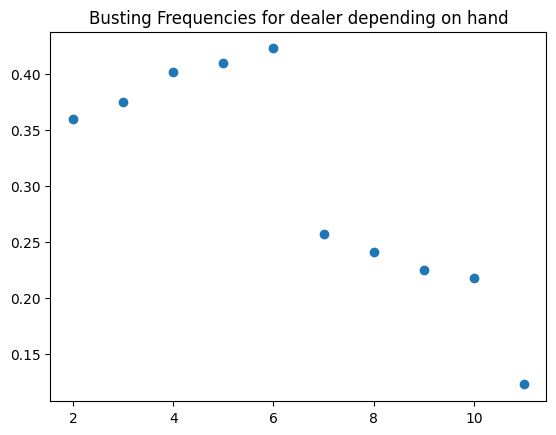

In [ ]:
plt.scatter(range(2,12),busting_freq)
plt.title("Busting Frequencies for dealer depending on hand")
display(pd.DataFrame(busting_freq,range(2,12)))
plt.show()


## Interface for bots & algorithms

Here, we'll try to extend this by examining different kinds of card-counting strategies and see how they fare over the long term, with base bet units of 1 to be simulated ____ number of times (fill this in later). Here are some betting bot strategies here:

1. Martingale: doubling bet after each loss, return to initial bet after a win

2. Hi-Lo: Most popular one, with 2,3,4,5,6 being +1, 7-9 being +0, and 10-A being -1 (more positive counts = better chance of winning). Bet will be (true count - 1) * (base betting unit)

3. Hi-Opt:

  1.   4 and 5 | +2
  2.   2, 3. 6. and 7 | +1
  2.   8 and 9 | +0
  2.   10 to K | -2

4. Constant bets, basic strategy